## Louvain

40 matrix resolution values, 10 runs per value

In [250]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


ID = 0

l = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="louvain")
)

In [251]:
K = 2

n_all = l.shape[0]

n_groups = l.groupby(l.matrix_res).ngroups
n_in_group = l.groupby(l.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 40 resolution param values, each value run 10 times.


In [252]:
# Only res. samples with 2 communities
l = l[l["k"] == K]

scores = l.mod_score
matrix_res = l.matrix_res

l_by_res = l.groupby(l.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
l_by_res = l_by_res.round(score_prec)
l_by_res.index = l_by_res.index.to_series().round(idx_prec)

print(f"{l.shape[0]} results entries for {K} communities")
print(f"{l_by_res.shape[0]} resolution value params for {K} communities")

211 results entries for 2 communities
29 resolution value params for 2 communities


Text(0.5, 0, 'Mean modularity scores hist')

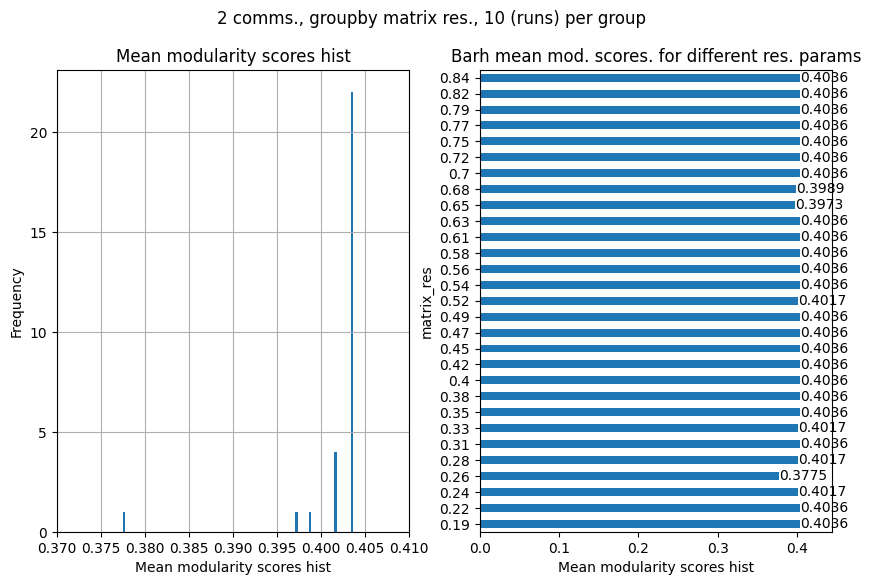

In [253]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle(f"{K} comms., groupby matrix res., {n_in_group} (runs) per group")

l_mean_hist = l_by_res.mod_score["mean"].plot(
    ax=axes[0], kind="hist", bins=100, grid=True
)
axes[0].set_title("Mean modularity scores hist")
axes[0].set_xlabel("Mean modularity scores hist")
axes[0].set_xlim(0.37, 0.41)

l_mean_barh = l_by_res.mod_score["mean"].plot(ax=axes[1], kind="barh")
axes[1].bar_label(axes[1].containers[-1], label_type="edge")
axes[1].margins(x=0.1)
axes[1].set_title("Barh mean mod. scores. for different res. params")
axes[1].set_xlabel("Mean modularity scores hist")

In [254]:
l_x_min = l_by_res.index.min()
l_x_max = l_by_res.index.max()
l_score_mean_min = l_by_res.mod_score["mean"].min()
l_score_mean_max = l_by_res.mod_score["mean"].max()

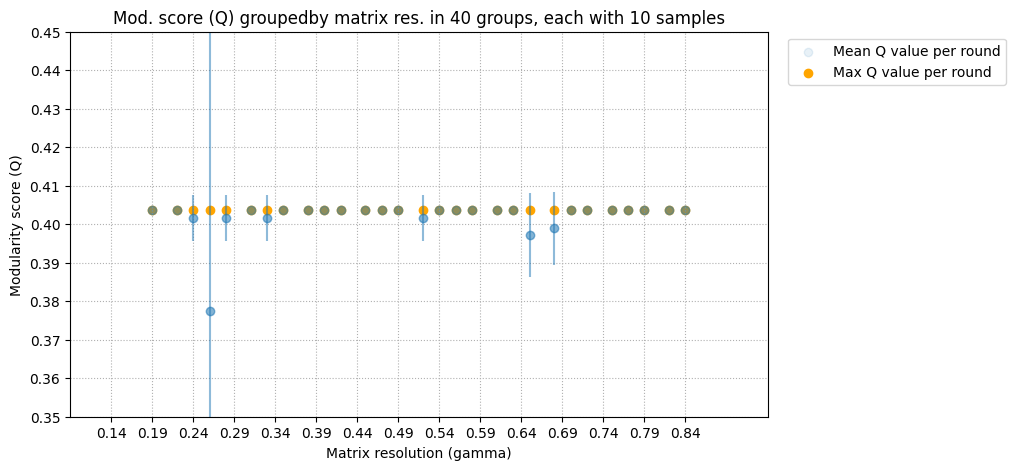

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


plt.rcParams["figure.figsize"] = (9, 5)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mod. score (Q) groupedby matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(l_x_min - x_margin, l_x_max + x_margin)
axes.set_xticks(
    np.arange(
        l_x_min - x_margin / 2, l_x_max + x_margin / 2, step=x_margin / 2
    )
)
axes.set_ylim(l_score_mean_min, l_score_mean_max)
axes.set_yticks(np.arange(0.35, 0.45, 0.01))

axes.scatter(
    l_by_res.mod_score.index,
    l_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    l_by_res.mod_score.index,
    l_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    l_by_res.mod_score.index,
    l_by_res.mod_score["mean"],
    yerr=l_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

## Advantage

In [256]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


ID = 0

a = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="adv")
)

In [257]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 2 resolution param values, each value run 2 times.


In [258]:
# Only res. samples with 2 communities
print(np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries for {K} communities")
print(f"{a_by_res.shape[0]} resolution value params for {K} communities")

True
4 results entries for 2 communities
2 resolution value params for 2 communities


Text(0.5, 0, 'Mean modularity scores hist')

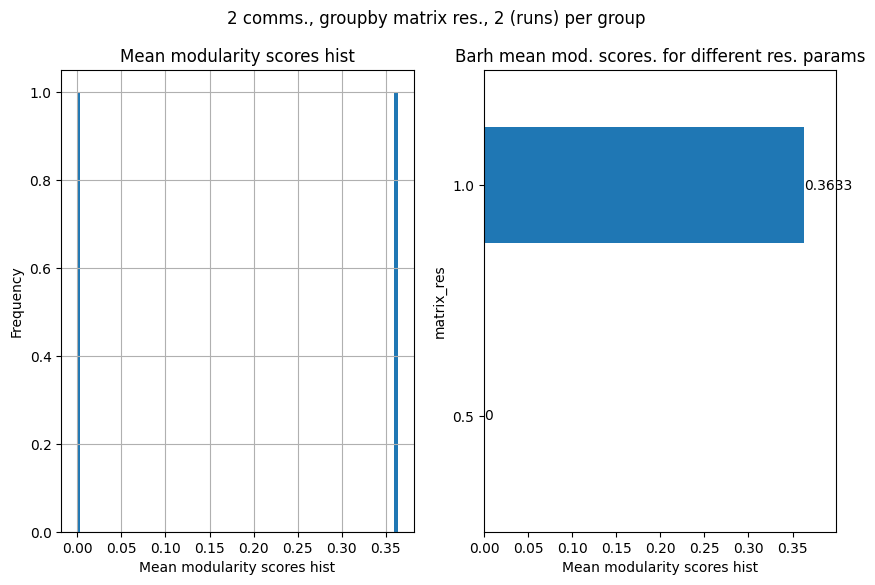

In [259]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle(f"{K} comms., groupby matrix res., {n_in_group} (runs) per group")

a_mean_hist = a_by_res.mod_score["mean"].plot(
    ax=axes[0], kind="hist", bins=100, grid=True
)
axes[0].set_title("Mean modularity scores hist")
axes[0].set_xlabel("Mean modularity scores hist")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=axes[1], kind="barh")
axes[1].bar_label(axes[1].containers[-1], label_type="edge")
axes[1].margins(x=0.1)
axes[1].set_title("Barh mean mod. scores. for different res. params")
axes[1].set_xlabel("Mean modularity scores hist")

In [260]:
a_x_min = a_by_res.index.min()
a_x_max = a_by_res.index.max()
a_score_mean_min = a_by_res.mod_score["mean"].min()
a_score_mean_max = a_by_res.mod_score["mean"].max()

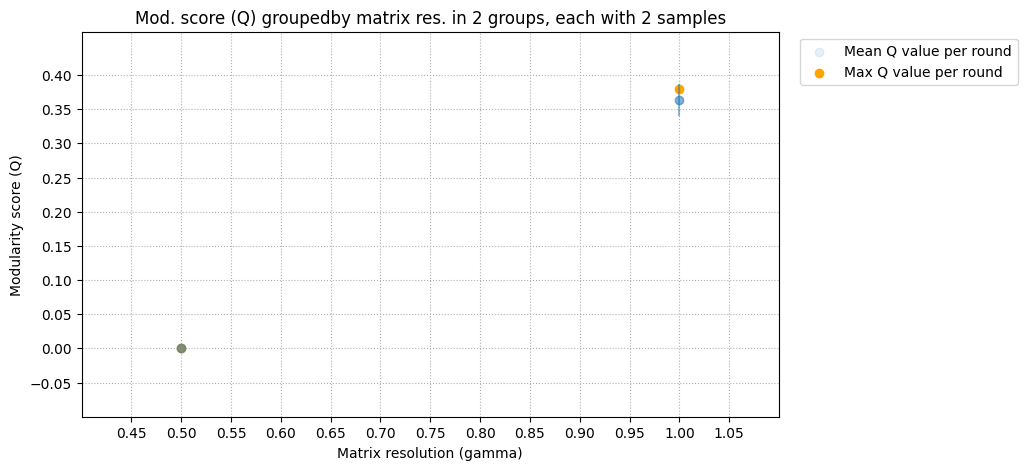

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


plt.rcParams["figure.figsize"] = (9, 5)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mod. score (Q) groupedby matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(a_x_min - x_margin, a_x_max + x_margin)
axes.set_xticks(
    np.arange(
        a_x_min - x_margin / 2, a_x_max + x_margin / 2, step=x_margin / 2
    )
)
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

## Comparison

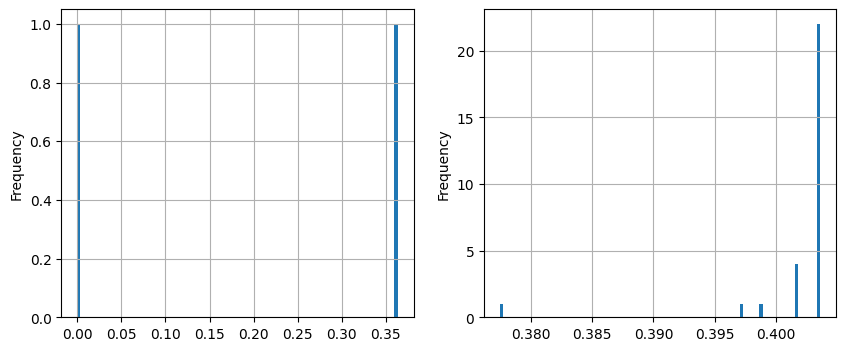

In [262]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

a_mean_hist = a_by_res.mod_score["mean"].plot(
    ax=axes[0], kind="hist", bins=100, grid=True
)
l_mean_hist = l_by_res.mod_score["mean"].plot(
    ax=axes[1], kind="hist", bins=100, grid=True
)